# NOTEBOOK 2


# INTRODUCTION
  After the cleaning of the data set, there is need to find the features in the dataset that best predicts income of students after enrollment. This can be achieved by fitting different models to the train set and using the feature coefficients as a determinant. Let's explore these processes.


![](https://www.timeshighereducation.com/student/_next/image?url=https%3A%2F%2Fwww.timeshighereducation.com%2Fstudent%2Fsites%2Fdefault%2Ffiles%2Fstyles%2Fdefault%2Fpublic%2Fpaying_for_university.jpg%3Fitok%3DTkairu_k&w=1080&q=75)

In [1]:
# Import all the relevant packages
import numpy as np # for linear algebra
import pandas as pd # for data manipulation and analysis

import seaborn as sns # for data visualization and plots
import matplotlib.pyplot as plt
%matplotlib inline

# To split the data as necessary for modelling
from sklearn.model_selection import train_test_split

# To build a model
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.inspection import permutation_importance

# Import shap and XGBoost
import shap
from xgboost import XGBRegressor 

# To get rid of warnings that appear if sklearn hasn't been updated
import warnings
warnings.filterwarnings('ignore')

# To "pickle" things, like accuracies or even an entire fitted model
import joblib

# To try scaling the data in various ways
from sklearn.preprocessing import StandardScaler

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


## BASIC EXPLORATORY DATA ANALYSIS
**Methodology:**
- Read in the data given
- Find the shape of the dataset
- Define the feature(X) and target(y) variables

In [2]:
# Read in each .csv files
test = pd.read_csv('cleaned_test.csv')
test

,academics__program_assoc_business_marketing,academics__program_assoc_health,academics__program_bachelors_business_marketing,academics__program_certificate_lt_1_yr_health,academics__program_certificate_lt_2_yr_business_marketing,academics__program_certificate_lt_2_yr_health,academics__program_percentage_biological,academics__program_percentage_business_marketing,academics__program_percentage_communication,academics__program_percentage_computer,...,"school__region_id_New England (CT, ME, MA, NH, RI, VT)","school__region_id_Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)","school__region_id_Plains (IA, KS, MN, MO, NE, ND, SD)","school__region_id_Rocky Mountains (CO, ID, MT, UT, WY)","school__region_id_Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)","school__region_id_Southwest (AZ, NM, OK, TX)",report_year_year_a,report_year_year_f,report_year_year_w,report_year_year_z
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.099400,0.000000,0.010000,...,0,0,0,0,0,0,0,1,0,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,1,0,0,0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.598959,0.866285,0.476323,0.431844,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9092,0.0,0.0,1.0,1.0,0.0,0.0,0.040500,0.300800,0.060500,0.012600,...,1,0,0,0,0,0,0,1,0,0
9093,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
9094,1.0,1.0,1.0,0.0,0.0,0.0,0.040700,0.160100,0.064300,0.032800,...,0,0,0,0,1,0,0,0,1,0
9095,1.0,1.0,1.0,0.0,1.0,1.0,0.048200,0.086800,0.035400,0.003200,...,0,0,0,0,0,1,0,1,0,0


In [3]:
test.index.name='row_id'
test

,academics__program_assoc_business_marketing,academics__program_assoc_health,academics__program_bachelors_business_marketing,academics__program_certificate_lt_1_yr_health,academics__program_certificate_lt_2_yr_business_marketing,academics__program_certificate_lt_2_yr_health,academics__program_percentage_biological,academics__program_percentage_business_marketing,academics__program_percentage_communication,academics__program_percentage_computer,...,"school__region_id_New England (CT, ME, MA, NH, RI, VT)","school__region_id_Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)","school__region_id_Plains (IA, KS, MN, MO, NE, ND, SD)","school__region_id_Rocky Mountains (CO, ID, MT, UT, WY)","school__region_id_Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)","school__region_id_Southwest (AZ, NM, OK, TX)",report_year_year_a,report_year_year_f,report_year_year_w,report_year_year_z
row_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.099400,0.000000,0.010000,...,0,0,0,0,0,0,0,1,0,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,1,1,0,0,0
4,1.0,1.0,0.0,1.0,0.0,1.0,0.598959,0.866285,0.476323,0.431844,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9092,0.0,0.0,1.0,1.0,0.0,0.0,0.040500,0.300800,0.060500,0.012600,...,1,0,0,0,0,0,0,1,0,0
9093,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,1,0,0,0
9094,1.0,1.0,1.0,0.0,0.0,0.0,0.040700,0.160100,0.064300,0.032800,...,0,0,0,0,1,0,0,0,1,0


In [4]:
train = pd.read_csv('cleaned_train.csv', )
train

,academics__program_assoc_business_marketing,academics__program_assoc_health,academics__program_bachelors_business_marketing,academics__program_certificate_lt_1_yr_health,academics__program_certificate_lt_2_yr_business_marketing,academics__program_certificate_lt_2_yr_health,academics__program_percentage_biological,academics__program_percentage_business_marketing,academics__program_percentage_communication,academics__program_percentage_computer,...,"school__region_id_Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)","school__region_id_Plains (IA, KS, MN, MO, NE, ND, SD)","school__region_id_Rocky Mountains (CO, ID, MT, UT, WY)","school__region_id_Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)","school__region_id_Southwest (AZ, NM, OK, TX)",report_year_year_a,report_year_year_f,report_year_year_w,report_year_year_z,income
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,1,0,0,0,46.9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,26.7
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,0,0,0,1,28.1
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0705,0.4108,0.0104,0.0436,...,0,1,0,0,0,0,1,0,0,41.6
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0459,0.2184,0.0515,0.0362,...,0,0,0,0,0,1,0,0,0,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17008,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,1.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,1,19.5
17009,1.0,1.0,0.0,1.0,1.0,1.0,0.0000,0.0307,0.0000,0.0921,...,0,0,0,1,0,0,1,0,0,20.7
17010,0.0,1.0,0.0,1.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,28.0
17011,0.0,0.0,0.0,1.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,1,0,22.4


In [5]:
train.index.name='row_id'
train

,academics__program_assoc_business_marketing,academics__program_assoc_health,academics__program_bachelors_business_marketing,academics__program_certificate_lt_1_yr_health,academics__program_certificate_lt_2_yr_business_marketing,academics__program_certificate_lt_2_yr_health,academics__program_percentage_biological,academics__program_percentage_business_marketing,academics__program_percentage_communication,academics__program_percentage_computer,...,"school__region_id_Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)","school__region_id_Plains (IA, KS, MN, MO, NE, ND, SD)","school__region_id_Rocky Mountains (CO, ID, MT, UT, WY)","school__region_id_Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)","school__region_id_Southwest (AZ, NM, OK, TX)",report_year_year_a,report_year_year_f,report_year_year_w,report_year_year_z,income
row_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,1,0,0,0,46.9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,26.7
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,0,0,0,1,28.1
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0705,0.4108,0.0104,0.0436,...,0,1,0,0,0,0,1,0,0,41.6
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0459,0.2184,0.0515,0.0362,...,0,0,0,0,0,1,0,0,0,34.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17008,1.0,0.0,0.0,0.0,1.0,0.0,0.0000,1.0000,0.0000,0.0000,...,0,0,0,0,0,0,0,0,1,19.5
17009,1.0,1.0,0.0,1.0,1.0,1.0,0.0000,0.0307,0.0000,0.0921,...,0,0,0,1,0,0,1,0,0,20.7
17010,0.0,1.0,0.0,1.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,28.0


In [6]:
# EDA for train data checking data shape, missing values and duplicates
print(f"Rows: {train.shape[0]}")
print(f"Columns: {train.shape[1]}")
print(f"Missing values: {train.isna().sum().sum()}")
print(f"Duplicated rows: {train.duplicated().sum()}")

Rows: 17013
Columns: 72
Missing values: 0
Duplicated rows: 0


In [7]:
# EDA for test data checking data shape, missing values and duplicates
print(f"Rows: {test.shape[0]}")
print(f"Columns: {test.shape[1]}")
print(f"Missing values: {test.isna().sum().sum()}")
print(f"Duplicated rows: {test.duplicated().sum()}")

Rows: 9097
Columns: 71
Missing values: 0
Duplicated rows: 0


## MODEL FITTING AND FEATURE SELECTION

In [8]:
# Define the features(X) and target(y) variables for the train set

X_train = train.drop(columns='income')
y_train = train['income']

# Define the features(X) variables for the test set
X_test = test

- Because there are no imputed values for income in the test set because the income of the test set is being predicted, we will go on to fit the train set with different models 
- The model with the lowest Root mean squared error will be a better predictor of the income of the test set

In [9]:
# checking subset(train and test) dimensions for errors
print(X_train.shape, X_test.shape, y_train.shape)

(17013, 71) (9097, 71) (17013,)


In [10]:
# Scaling our train and test sets
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Linear Regression with L2 Regularization
ridge = Ridge(alpha= 1.0)

# Train the model using the training sets
ridge.fit(X_train_scaled, y_train)

# Make predictions on the test and train set
y_train_pred = ridge.predict(X_train_scaled)

In [12]:
# The coefficients
print("Coefficients: \n", ridge.coef_)

# The Root Mean Squared Error for train set
print("Root Mean squared error: %.2f" % mean_squared_error(y_train, y_train_pred, squared=False))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_train_pred))

Coefficients: 
 [-7.04068514e-01  3.35356780e-03 -3.52707452e-01 -5.34014807e-01
 -3.46947475e-01 -4.52759346e-01  3.35914877e-02  1.07193854e+00
  1.92151969e-01  7.38365628e-03 -7.69764709e-01  4.21303434e-01
 -5.78169614e-01  2.69031774e+00 -2.42112899e-01 -1.28806025e-01
  2.78675062e-02  1.29588529e-01 -3.71189976e-01 -1.16755291e-01
 -2.94345616e-01 -8.26702055e-01  1.15072780e+00 -1.32573066e-01
  2.14219461e+00  2.54407260e+00  3.52589485e-02  1.36347269e+00
 -1.06148728e-01 -5.31054013e-01  1.28110999e+00  1.58161843e+00
 -1.52234230e+00  3.76095215e+00  2.05741591e-01  8.59170492e-01
  3.08521800e-01 -2.18640807e-01 -3.59085884e-01 -6.22375347e+00
 -6.38641131e-01 -2.49573780e-01  2.82237708e+00  2.88001761e-01
 -1.25014574e+00 -1.33637336e+00 -1.61387113e+00 -5.74125959e-01
 -6.51768221e-01  2.14263781e-01  4.93532218e-01  8.41986310e-02
  1.04868037e+00 -1.35429849e+00  2.08067669e+00  8.55350607e-01
  1.59820642e+00  1.30107618e+00  2.49985260e-01 -2.63608516e-01
  9.21863

In [13]:
# Put the variable names and their coefficient values into a data frame
coef_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficients': ridge.coef_})

# Sort coefficients in descending order
coef_df.sort_values(by='Coefficients', ascending=False, inplace=True, ignore_index=True) 

coef_df

,Variable,Coefficients
0,student__demographics_first_generation,3.760952
1,student__share_independent_students,2.822377
2,academics__program_percentage_health,2.690318
3,school__faculty_salary,2.544073
4,school__degrees_awarded_predominant_recoded,2.142195
...,...,...
66,school__degrees_awarded_highest_Bachelor's degree,-1.336373
67,school__institutional_characteristics_level_Le...,-1.354298
68,student__demographics_female_share,-1.522342
69,school__degrees_awarded_highest_Certificate de...,-1.613871


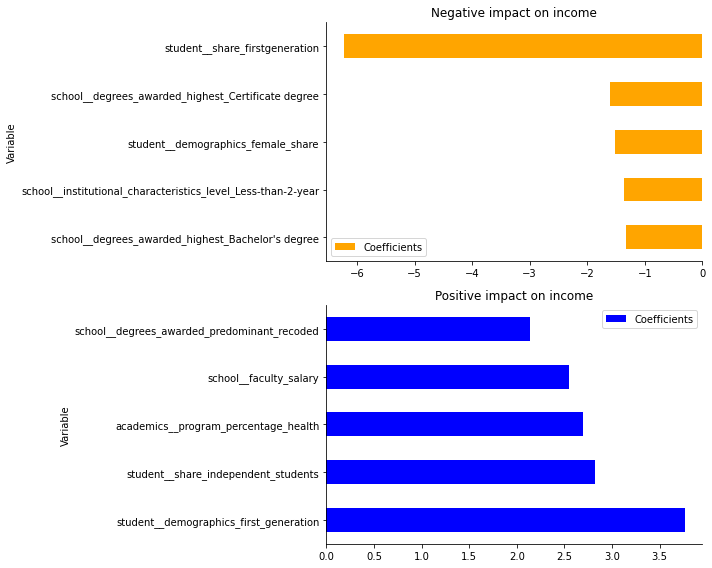

In [14]:
# Visualizing feature importance using the coefficients of the features
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# smallest coefficient -> tokens indicating negative coefficients 
coef_df.tail(5).set_index("Variable").plot(kind="barh", ax=axs[0], color="orange")
axs[0].set_title("Negative impact on income")
 
    
# largest coefficient -> tokens indicating positive coefficients 
coef_df.head(5).set_index("Variable").plot(kind="barh", ax=axs[1], color="blue")
axs[1].set_title("Positive impact on income")
    
sns.despine()
plt.tight_layout()
plt.show()

**TOP FIVE FEATURES THAT HAVE THE HIGHEST IMPACT ON INCREASING INCOME:**
- student__demographics_first_generation	
- student__share_independent_students	
- school__faculty_salary	
- academics__program_percentage_health	
- school__degrees_awarded_predominant_recoded

**FIVE FEATURES THAT HAVE AN IMPACT ON DECREASING INCOME:**
- school__degrees_awarded_highest_Certificate degree
- school__region_id_Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)
- student__demographics_female_share	
- school__degrees_awarded_highest_Bachelor's degree	
- student__share_firstgeneration	

In [15]:
DT = DecisionTreeRegressor(max_depth=5, random_state=42)

DT.fit(X_train, y_train)

# Make predictions 
y_pred_train = DT.predict(X_train)

# The Root Mean Squared Error for train set
print("Root Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_train, squared=False))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred_train))

Root Mean squared error: 6.68
Coefficient of determination: 0.65


- We got the same value for both the Decision tree and the ridge regression model with a mean squared error of 6.68
- We will fit another model to get a lower RMSE score for the prediction

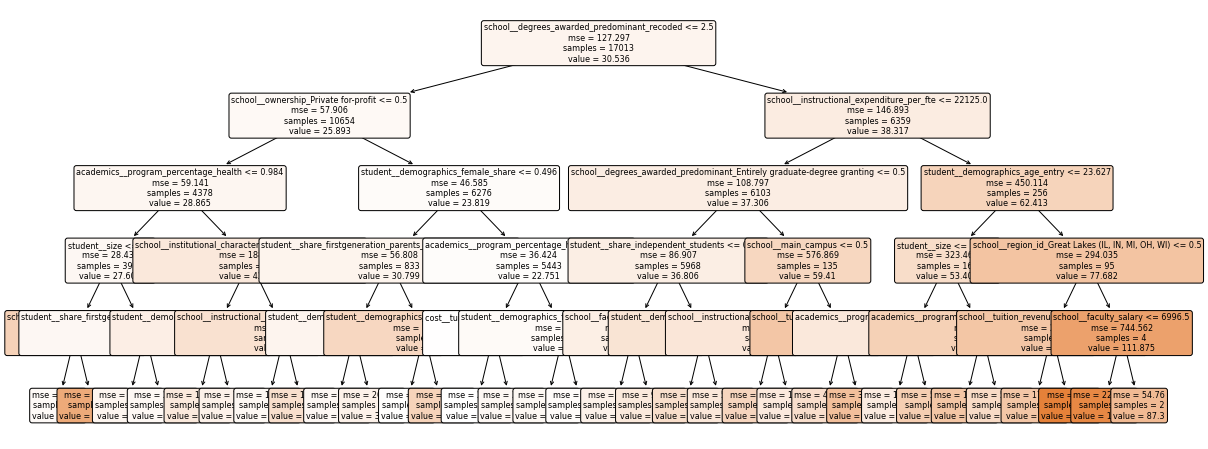

In [16]:
fig, ax = plt.subplots(figsize=(20,8))

plot_tree(DT,
          feature_names=X_train.columns,
          rounded=True,
          impurity=True,
          filled=True,
          ax=ax,
          fontsize=8)

plt.show()

In [17]:
# Checking and Placing the feature importances in a dataframe
importances_df = pd.DataFrame({'Variable': X_train.columns,
                               'Importance': DT.tree_.compute_feature_importances(normalize=True)
                               })

importances_df.sort_values(by='Importance', ascending=False, inplace=True, ignore_index=True)

importances_df

,Variable,Importance
0,school__degrees_awarded_predominant_recoded,0.436867
1,school__instructional_expenditure_per_fte,0.118127
2,academics__program_percentage_health,0.067334
3,school__faculty_salary,0.060470
4,school__degrees_awarded_predominant_Entirely g...,0.047940
...,...,...
66,student__demographics_married,0.000000
67,academics__program_assoc_health,0.000000
68,student__part_time_share,0.000000
69,student__share_25_older,0.000000


<Figure size 720x576 with 0 Axes>

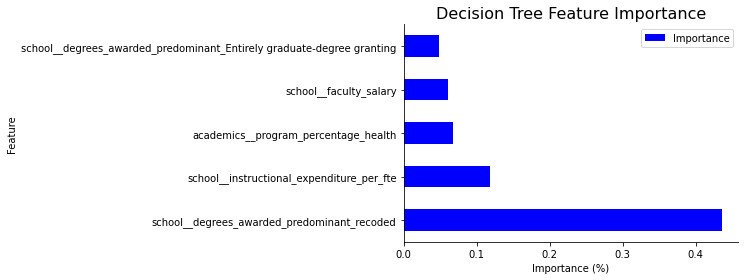

In [18]:
# Visualize the feature importance
plt.figure(figsize=(10,8))
importances_df.head(5).set_index("Variable").plot(kind="barh", color="blue")
plt.title('Decision Tree Feature Importance', fontsize=16)
plt.ylabel('Feature')
plt.xlabel('Importance (%)')
sns.despine()
plt.show()

We can see that the top 3 most important features are:

- school__degrees_awarded_predominant_recorded
- school__institutional_expenditure_per_fte
- school__program_percentage_health

In [19]:
# Fit XGBoost model 
my_xgb = XGBRegressor(n_estimators=200, max_depth=10, learning_rate=0.3, random_state=88)
my_xgb.fit(X_train, y_train)

# Make predictions 
y_pred1_train = my_xgb.predict(X_train)

# The Root Mean Squared Error for train set
print("Root Mean squared error: %.2f" % mean_squared_error(y_train, y_pred1_train, squared=False))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred1_train))

Root Mean squared error: 0.21
Coefficient of determination: 1.00


**Observations**
- The XGBoostRegressor model gave a better prediction than the decision tree and ridge regressor models
- We will use the Shapley model to explain the XGboost model fitted

In [20]:
%%time 
# Interprete using Shapley values

# Fit tree-specific kernel for SHAP  
explainer = shap.TreeExplainer(my_xgb)

# Obtain SHAP values 
shap_values = explainer.shap_values(X_train)

CPU times: total: 7min 26s
Wall time: 1min 3s


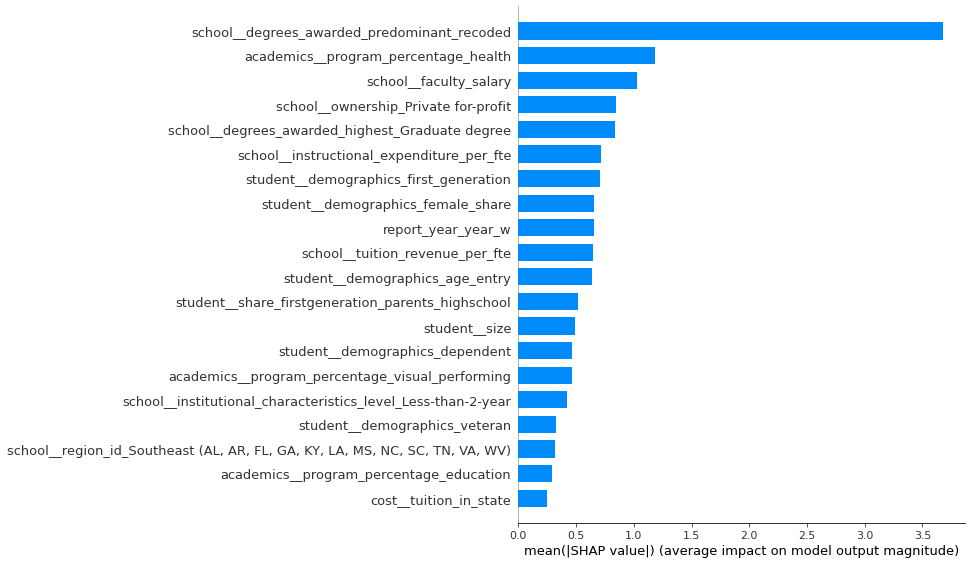

In [21]:
# Global interpretation - summary plot - type='bar'
shap.initjs()

shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')

**NEXT STEPS AND PLANS**
- Fitting all these models gave us an idea of the models to use in order to predict the target variable 'income'
- We will go on to do a hyperparameter model tuning using grid search to find the best model for the imncome prediction in the next notebook